In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9875776397515529
P-value: 1.500414155629743e-17


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.606232958329517e-05


In [7]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9875776397515529
P-value: 1.500414155629743e-17


In [8]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.606743810943358e-05


In [9]:
weights_unenc_ckks

[0.041751400083041096,
 0.21659820024888587,
 -0.0017311029355377497,
 0.1760451011226825,
 -0.1016527998073499,
 0.01010919966102899,
 -0.029546701768512457,
 0.017242500167416963,
 0.34728399971686813,
 0.11915639892338467,
 0.19956160073241558,
 0.24533999963753095,
 0.11857340273258132,
 0.11278559897861587,
 0.15184379909654874,
 0.08515359886464967,
 0.10725349976977469,
 -0.059187298276742656,
 -0.07407150007701753,
 -0.2204026006960138,
 -0.28558409995932343,
 -0.09069049932233898]

In [10]:
weights_unenc_sklearn

array([ 0.03671275,  0.20955806, -0.00306475,  0.1824832 , -0.08036864,
        0.02388373, -0.01111673,  0.01412081,  0.34663604,  0.10891553,
        0.20300092,  0.23875328,  0.1219154 ,  0.12387049,  0.13370881,
        0.0924558 ,  0.11035144, -0.06849454, -0.08768642, -0.22155581,
       -0.27900073, -0.09082474])

In [11]:
weights_unenc_paillier

[0.04175310887061029,
 0.21660003353360677,
 -0.001730806423092042,
 0.17604551548522,
 -0.10165067236654358,
 0.010108731199506874,
 -0.029547079619093544,
 0.01724420412522336,
 0.34728266724600343,
 0.11915511454185872,
 0.19956250283658694,
 0.2453409528701785,
 0.11857343786471274,
 0.11278422777888829,
 0.1518437980758689,
 0.08515271923901847,
 0.1072536107875757,
 -0.059185397622508754,
 -0.07406940640706677,
 -0.22040263080229944,
 -0.2855851991383298,
 -0.09069215028553274]

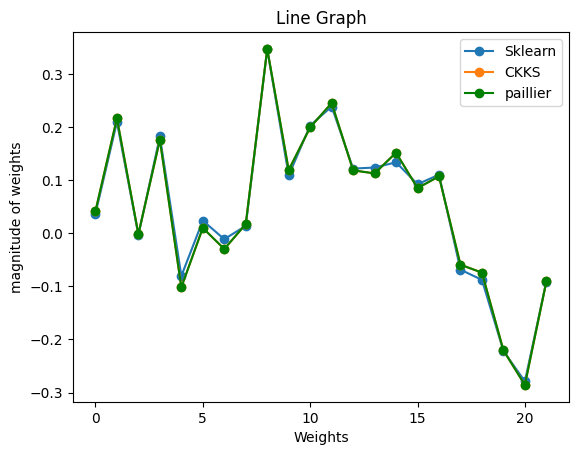

In [12]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

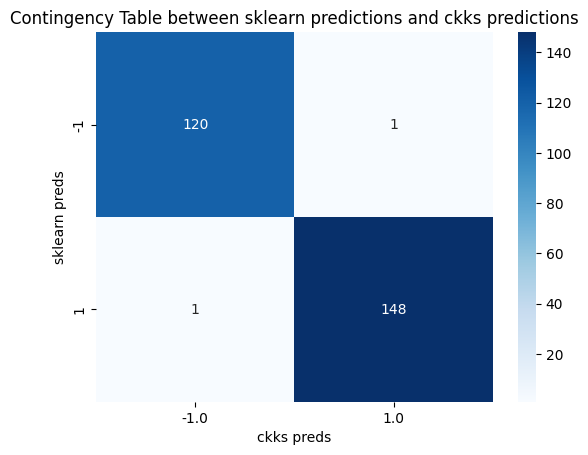

In [13]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

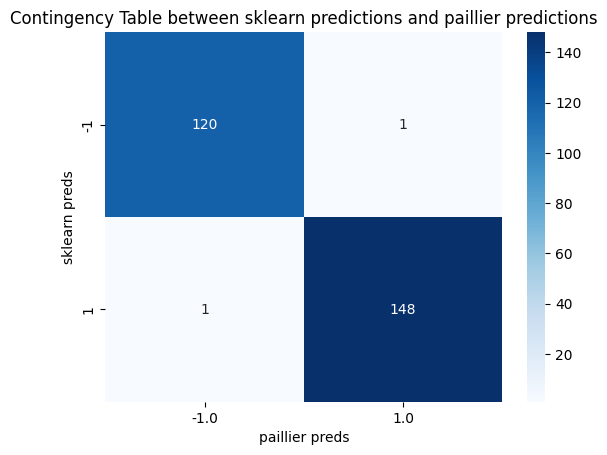

In [14]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

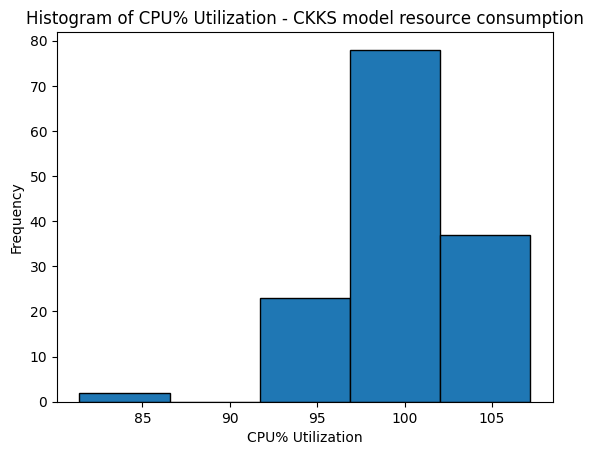

In [15]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [16]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

99.825
100.3


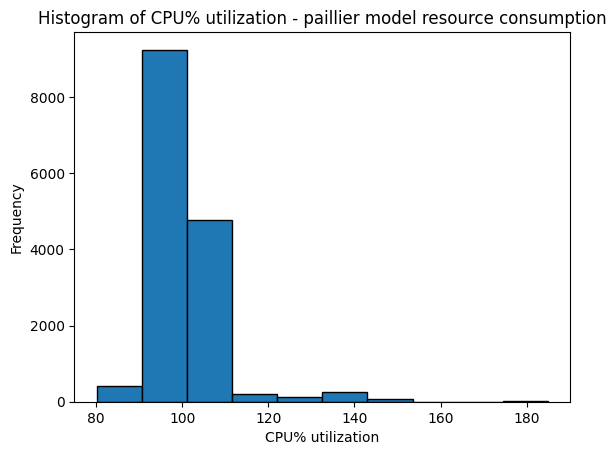

In [17]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [18]:
np.mean(filtered_paillier_cpu_util)

100.93625951671632

Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

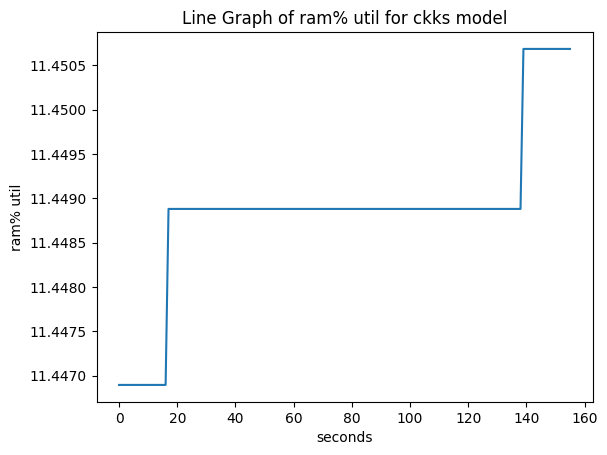

In [19]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [20]:
import numpy as np
np.mean(ram_usages_ckks)

11.448861066691974

Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

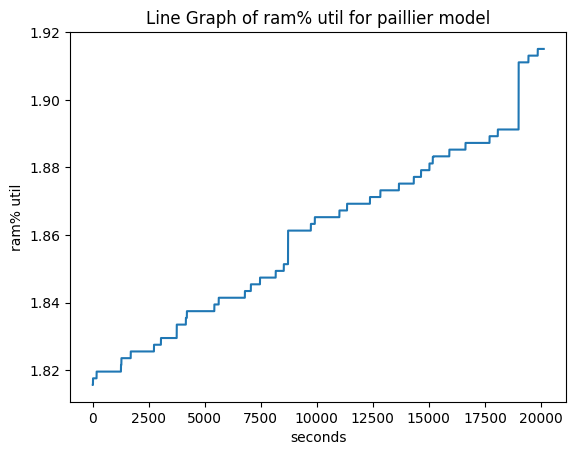

In [21]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [22]:
np.mean(ram_usages_paillier)

1.8600674668522232

In [23]:
np.mean(ram_usages_sklearn)

1.5987407508844693

In [24]:
train_time_ckks

154.32278871536255

In [25]:
train_time_paillier

19076.586651325226

In [26]:
testing_time_ckks

8.983169078826904

In [27]:
testing_time_paillier

937.2992987632751

In [28]:
accuracy_ckks, accuracy_sklearn, accuracy_paillier

(0.8037037037037037, 0.8037037037037037, 0.8037037037037037)